In [80]:
'''
From Section 14 of the Book: A morphological white tophat is an image minus its morphological opening. 
A morphological black tophat is an image minus its morphological closing. Implement each of these as a function.
What kinds of features do each of these emphasize? How does that depend on the structuring element that you use? 
Hint: skimage.morphology implements several structuring elements, including disk that you have already seen, 
but also square, diamond, and others. 

the morphological opening removed small bright objects. 
By subtracting the opening from the original image, the small bright objects are highlighted 
while disregarding the larger structural elements.  
the morphological closing filled in open areas and brightened them. By then subtracting the original image,
it emphasized small dark objects or details ,
which in this image was the negative space around the pixels of noise. 

The shape of size of the structuring element 
affects the frame of the dilation and erosion functions in the morphological operations.
If the structuring element is very large, it may miss smaller details. 
Certain shapes may also be biased against certain kinds of features. 
A square will emphasize similarly square or rectangular shapes or edges. 
Similarly a circular kernal will emphasize round or smooth objects. 
'''

from ndslib.config import jupyter_startup
jupyter_startup()

# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.morphology import disk, dilation, erosion, area_closing, area_opening



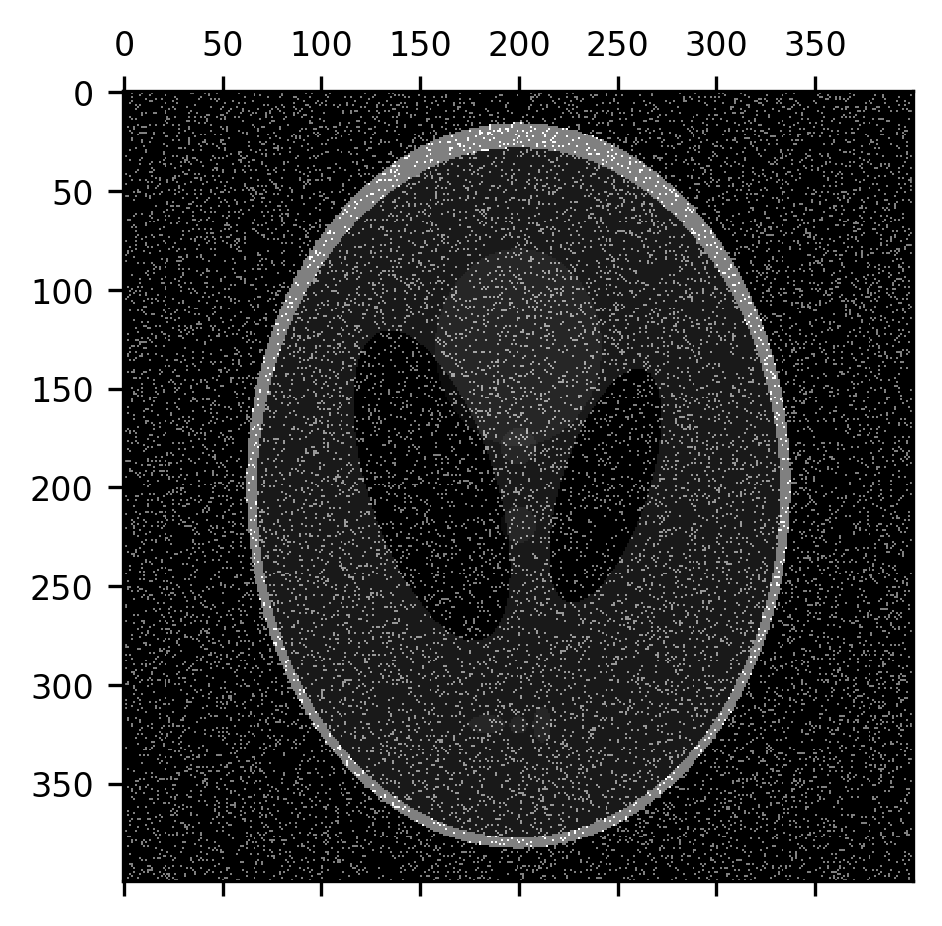

In [103]:
shepp_logan = skimage.data.shepp_logan_phantom()
noise = np.random.rand(400, 400) < 0.1
img=shepp_logan+noise
fig, ax = plt.subplots()
im = ax.matshow(img)

(<Figure size 1368x1026 with 1 Axes>, <Axes: >)

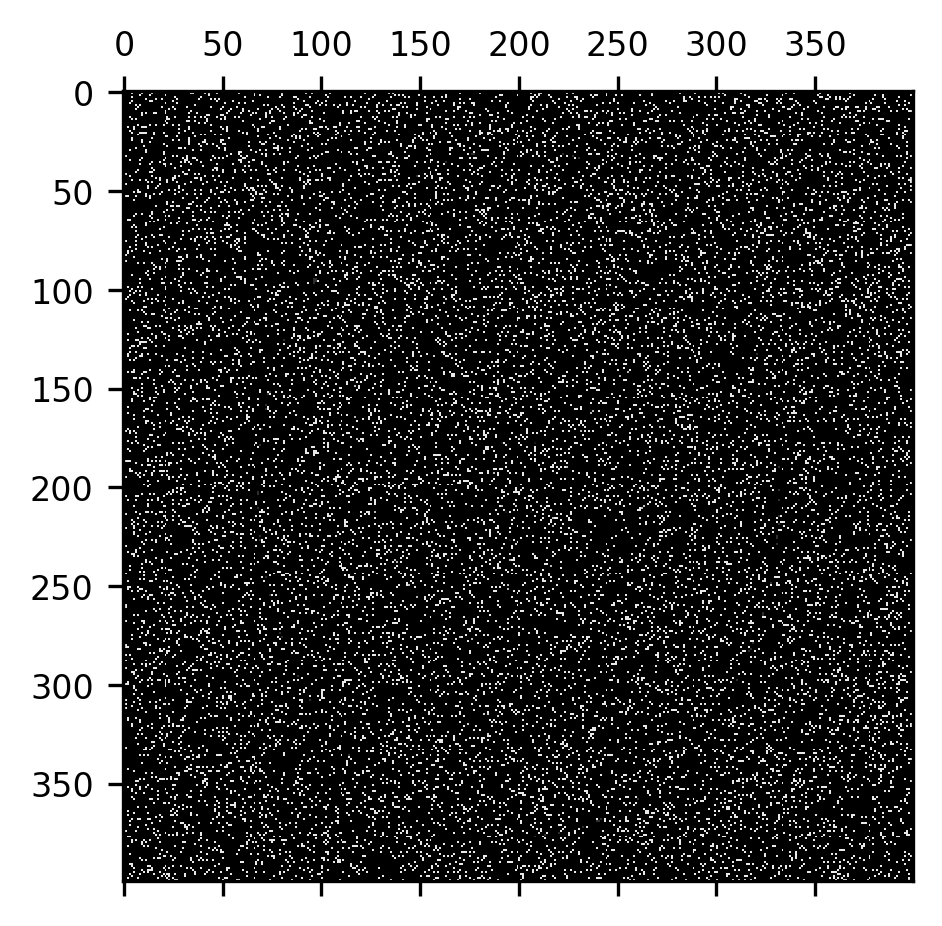

In [126]:
# morphological white tophat is an image minus its morphological opening
def white_tophat(img):
    wh = img - dilation(erosion(img))
    fig, ax = plt.subplots()
    im = ax.matshow(wh)

    return fig,ax

white_tophat(img)

(<Figure size 1368x1026 with 1 Axes>, <Axes: >)

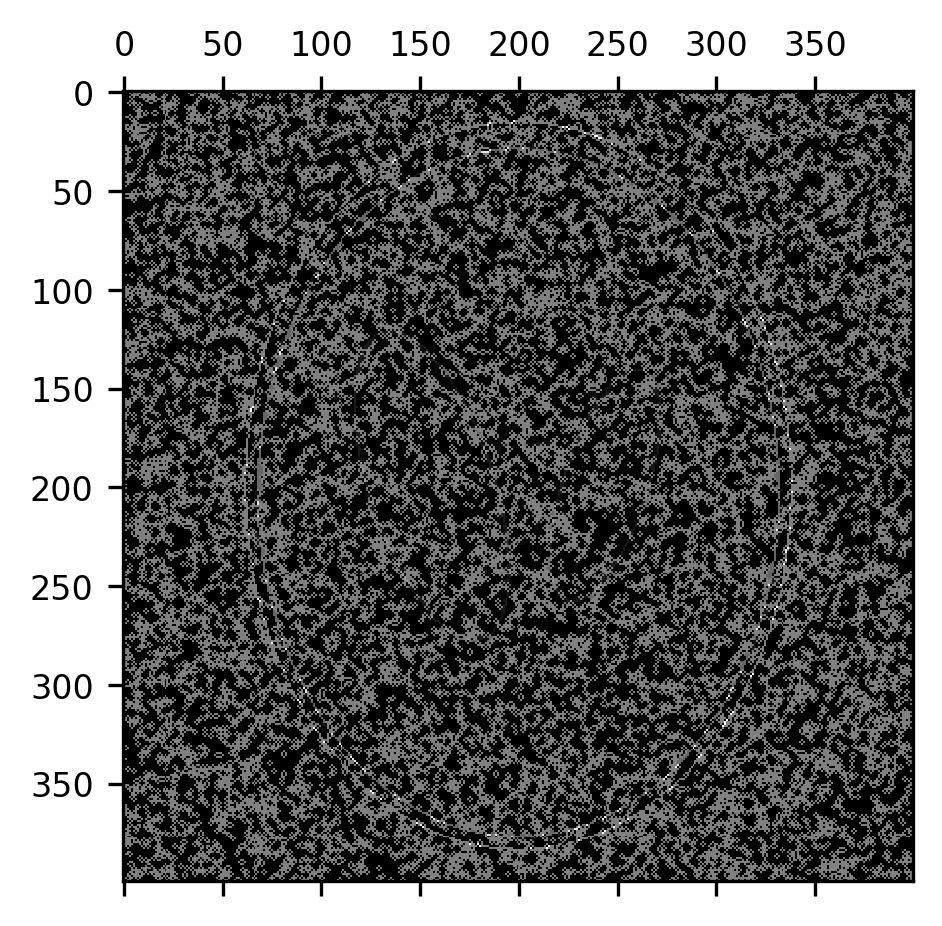

In [137]:
# morphological black tophat is an image minus its morphological closing
def black_tophat(img, disc_k):
    kernel = disk(disc_k)
    bh = erosion(dilation(img, kernel))- img 
    fig, ax = plt.subplots()
    im = ax.matshow(bh)

    return fig,ax
black_tophat(img,2)